# Titanic Disaster Survival Prediction

Importing required libraries

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

Creating training and test datasets

In [45]:
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

We will make a copy of these datasets so we can work on the copies for EDA.

In [46]:
training_working = training.copy()
test_working = test.copy()

In [47]:
training_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
test_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The attribute **Cabin** has more than 50% null values in both test and training datasets. We will therefore remove this attribute rather than handle it. We will also remove the **PassengerId, Ticket** and the **Name** attributes since they are not relevant for our analysis.

In [49]:
def dropNAs(df, attributes):
    return df.drop(attributes, axis = 1)

In [50]:
training_working = dropNAs(training_working, ['PassengerId', 'Name', 'Cabin', 'Ticket'])
test_working = dropNAs(test_working, ['PassengerId', 'Name', 'Cabin', 'Ticket'])

We will further explore the data to find which attributes are most strongly related to survival of a passenger.

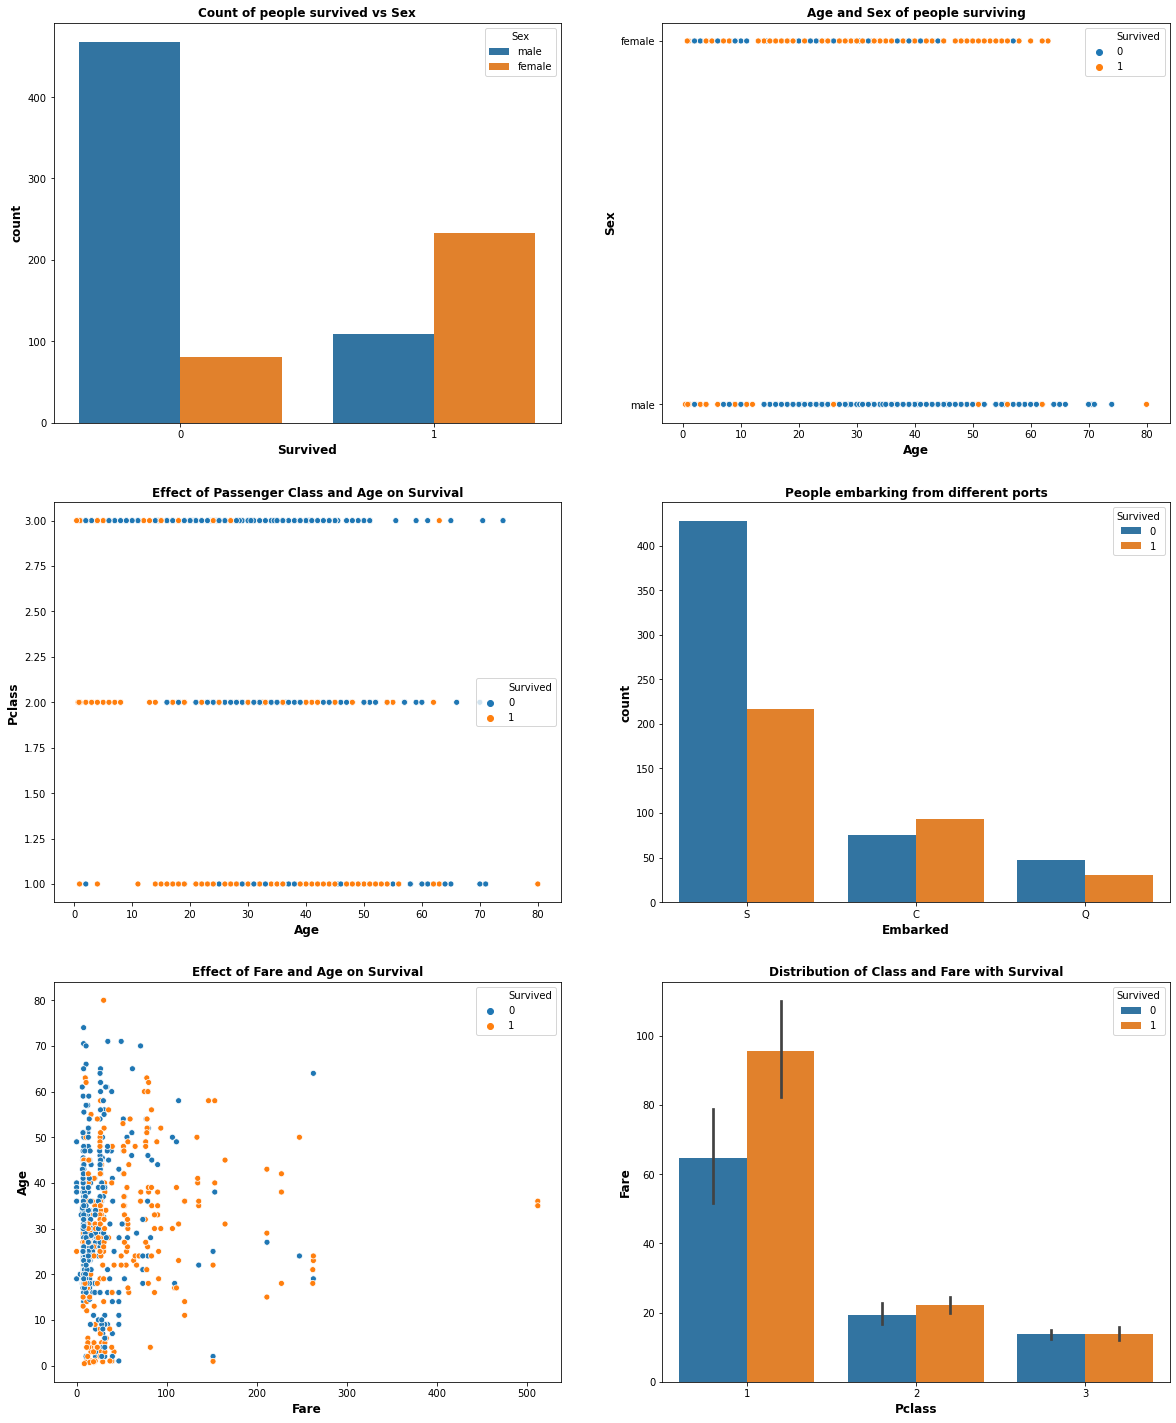

In [51]:
fig, axes = plt.subplots(3, 2, figsize = (20, 25))
axes[0, 0].set_title('Count of people survived vs Sex', fontsize = 12, fontweight = 'semibold')
axes[0, 0].set_ylabel('Count', fontsize = 12, fontweight = 'semibold')
axes[0, 0].set_xlabel('Survived', fontsize = 12, fontweight = 'semibold')
sns.countplot('Survived', data = training_working, hue='Sex', ax = axes[0, 0])
axes[0, 1].set_title('Age and Sex of people surviving', fontsize = 12, fontweight = 'semibold')
axes[0, 1].set_ylabel('Sex', fontsize = 12, fontweight = 'semibold')
axes[0, 1].set_xlabel('Age', fontsize = 12, fontweight = 'semibold')
sns.scatterplot('Age', 'Sex', data = training_working, hue = 'Survived', ax = axes[0, 1])
axes[1, 0].set_title('Effect of Passenger Class and Age on Survival', fontsize = 12, fontweight = 'semibold')
axes[1, 0].set_xlabel('Age', fontsize = 12, fontweight = 'semibold')
axes[1, 0].set_ylabel('Passenger Class', fontsize = 12, fontweight = 'semibold')
sns.scatterplot('Age', 'Pclass', data = training_working, hue = 'Survived', ax = axes[1, 0])
axes[1, 1].set_title('People embarking from different ports', fontsize = 12, fontweight = 'semibold')
axes[1, 1].set_xlabel('Port', fontsize = 12, fontweight = 'semibold')
axes[1, 1].set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])
axes[1, 1].set_ylabel('Count', fontsize = 12, fontweight = 'semibold')
sns.countplot('Embarked', data = training_working, hue='Survived', ax = axes[1, 1])
axes[2, 0].set_title('Effect of Fare and Age on Survival', fontsize = 12, fontweight = 'semibold')
axes[2, 0].set_xlabel('Fare', fontsize = 12, fontweight = 'semibold')
axes[2, 0].set_ylabel('Age', fontsize = 12, fontweight = 'semibold')
sns.scatterplot(x = 'Fare', y = 'Age', data = training_working, hue = 'Survived', ax = axes[2, 0])
axes[2, 1].set_title('Distribution of Class and Fare with Survival', fontsize = 12, fontweight = 'semibold')
axes[2, 1].set_xlabel('Passenger Class', fontsize = 12, fontweight = 'semibold')
axes[2, 1].set_ylabel('Fare', fontsize = 12, fontweight = 'semibold')
sns.barplot(x = 'Pclass', y = 'Fare', data = training_working, hue = 'Survived', ax = axes[2, 1]);

We can infer the following from the above analysis:
    <ul>Relatively more number of females survived the disaster.</ul>
    <ul>More females survived the disaster irrespective of the Age. Some males though, of very high age, around 80 did survive.</ul>
    <ul>Passenger Class has a significant role in determining the survival as passengers of class 1 were given preference above other classes.</ul>
    <ul>Passengers of class 1 did have more chances of survival. This is irrespective of their ages.</ul>
    <ul>The port of embarkation also seems to have some influence on the survival rate.</ul>
    <ul>Only a few passengers could afford high fares, but that did mean that they had high chances of survival.</ul>
    

In [52]:
def differentiateColumns(df):
    numericalColumns = list(df.describe())
    categoricColumns = set(df.columns) - set(numericalColumns)
    return numericalColumns, list(categoricColumns)

In [54]:
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_num = SimpleImputer(strategy='mean')

In [55]:
def fillMissing(df):
    numeric_variables, cat_variables = differentiateColumns(df)
    df_num = df.drop(cat_variables, axis = 1)
    X_num = imputer_num.fit_transform(df_num)
    df_cat = df.drop(numeric_variables, axis = 1)
    X_cat = imputer_cat.fit_transform(df_cat)
    df_num = pd.DataFrame(X_num, columns=df_num.columns, index = df_num.index)
    df_cat = pd.DataFrame(X_cat, columns=df_cat.columns, index = df_cat.index)
    return pd.concat([df_num, df_cat], axis = 1)

In [56]:
training_working.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [57]:
test_working.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [58]:
training_working = fillMissing(training_working)
test_working = fillMissing(test_working)

In [59]:
training_working.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Embarked    0
dtype: int64

In [60]:
test_working.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Embarked    0
dtype: int64